In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pickle
import matplotlib.pyplot as plt
from dateutil import relativedelta
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
msi = pd.read_csv('majorStockIndices.csv').reset_index()

In [3]:
msi.head()

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker,Adj Close
0,0,2010-01-04,1116.56,1133.87,1116.56,1132.99,3.991400e+09,0.0,0.0,^GSPC,NaN
1,1,2010-01-05,1132.66,1136.63,1129.66,1136.52,2.491020e+09,0.0,0.0,^GSPC,NaN
2,2,2010-01-06,1135.71,1139.19,1133.95,1137.14,4.972660e+09,0.0,0.0,^GSPC,NaN
3,3,2010-01-07,1136.27,1142.46,1131.32,1141.69,5.270680e+09,0.0,0.0,^GSPC,NaN
4,4,2010-01-08,1140.52,1145.39,1136.22,1144.98,4.389590e+09,0.0,0.0,^GSPC,NaN


In [4]:
msi.shape

(89915, 11)

In [5]:
msi.ticker.unique()

array(['^GSPC', '^DJI', '^IXIC', '^NYA', '^XAX', '^BUK100P', '^RUT',
       '^VIX', '^FTSE', '^GDAXI', '^FCHI', '^STOXX50E', '^N100', '^BFX',
       'IMOEX.ME', '^N225', '^HSI', '000001.SS', '399001.SZ', '^STI',
       '^AXJO', '^AORD', '^BSESN', '^JKSE', '^KLSE', '^NZ50', '^KS11',
       '^TWII', '^GSPTSE', '^BVSP', '^MXX', '^IPSA', '^MERV', '^TA125.TA',
       '^JN0U.JO'], dtype=object)

In [6]:
no = ['^NYA','^XAX','^BUK100P',"^VIX",'IMOEX.ME',"^AORD","^MERV","^JN0U.JO"]
msi = msi.loc[msi.ticker.isin(set(msi.ticker) - set(no))]

In [7]:
region_idx= { 'US & Canada' : ['^GSPC', '^DJI', '^IXIC', '^RUT','^GSPTSE'],
               'Latin America' : ['^BVSP', '^MXX', '^IPSA', ],
               'East Asia' : ['^N225', '^HSI', '000001.SS', '399001.SZ', '^TWII', '^KS11'],
               'ASEAN & Oceania' : ['^STI', '^JKSE', '^KLSE','^AXJO',  '^NZ50'],
               'South & West Asia' : ['^BSESN', '^TA125.TA'],
               'Europe' : ['^FTSE', '^GDAXI', '^FCHI', '^STOXX50E','^N100', '^BFX']
              }

In [8]:
ticker = { '^GSPC' : 'S&P 500',
           '^DJI' : 'Dow 30',
           '^IXIC' : 'NASDAQ', 
           '^RUT' : 'Russell 2000',
           '^GSPTSE' : 'S&P/TSX',
           '^BVSP' : 'IBOVESPA',
           '^MXX' : 'IPC MEXICO',
           '^IPSA' : 'S&P/CLX IPSA',
           '^N225' : 'Nikkei 225',
           '^HSI': 'Hang Seng Index',
           '000001.SS' : 'SSE Composite Index',
           '399001.SZ' : 'Shenzen Component',
           '^TWII' : 'TSEC Weighted Index',
           '^KS11' : 'KOSPI Composite Index',
           '^STI' : 'STI Index', 
           '^JKSE' : 'Jakarta Composite Index', 
           '^KLSE' : 'FTSE Bursa Malaysia KLCI',
           '^AXJO' : 'S&P/ASX 200',
           '^NZ50' : 'S&P/NZX 50 INDEX GROSS',
           '^BSESN' : 'S&P BSE SENSEX',
           '^TA125.TA' : 'TA-125',
           '^FTSE' : 'FTSE 100',
           '^GDAXI' : "DAX PERFORMANCE-INDEX",
           '^FCHI' : 'CAC 40',
           '^STOXX50E' : "ESTX 50 PR.EUR",
           '^N100': "EURONEXT 100",
           '^BFX' : "BEL 20",
           '^NYA' : "NYSE COMPOSITE (DJ)",
           '^XAX' : "NYSE AMEX COMPOSITE INDEX",
           '^BUK100P' : "Cboe UK 100 Price Return",
           "^VIX" : "CBOE Volatility Index",
           'IMOEX.ME' : 'MOEX Russia Index',
           "^AORD"  : "ALL ORDINARIES",
           "^MERV" : "MERVAL",
           "^JN0U.JO" : "Top 40 USD Net TRI Index"        
}

In [9]:
pagoda = ["#965757", "#D67469", "#4E5A44", "#A1B482", '#EFE482', "#99BFCF"]

In [10]:
def getRegion(ticker):
    for k in region_idx.keys():
        if ticker in region_idx[k]:
            return k
msi['region']= msi.ticker.apply(lambda x: getRegion(x))

# Return on 30 September 2020

In [11]:
lastDate = msi.loc[msi.Date == '2020-09-30'].reset_index().drop(['index'],axis=1)

In [12]:
lastDate.head()

,level_0,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker,Adj Close,region
0,2704,2020-09-30,3341.21,3393.56,3340.47,3363.00,4.722530e+09,0.0,0.0,^GSPC,NaN,US & Canada
1,5409,2020-09-30,27514.64,28026.33,27511.06,27781.70,4.525500e+08,0.0,0.0,^DJI,NaN,US & Canada
2,8114,2020-09-30,11092.90,11277.96,11092.90,11167.51,4.228200e+09,0.0,0.0,^IXIC,NaN,US & Canada
3,18771,2020-09-30,1504.84,1528.01,1498.29,1507.69,4.722530e+07,0.0,0.0,^RUT,NaN,US & Canada
4,24185,2020-09-30,5897.50,5931.40,5854.50,5866.10,8.319825e+08,0.0,0.0,^FTSE,NaN,Europe


In [13]:
cols = ['Date', 'ticker', 'region', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'Adj Close']
lastDate = lastDate[cols]

In [14]:
def nearest(dates, dateRef):
    
    dts = pd.to_datetime(dates)
    drf = pd.to_datetime(dateRef)
    
    prevDate = dts[dts < drf]
    return prevDate[-1]

def getReturn(period, number, ticker, dt, val):

    df = msi.loc[msi.ticker == ticker].reset_index()
    existingDates = df['Date'].unique()
    
    if period == 'Y':
        dtp = (pd.Timestamp(dt) - pd.DateOffset(years=number))
    elif period == 'M':
        dtp = (pd.Timestamp(dt) - pd.DateOffset(months=number))
    elif period == 'W':
        dtp = (pd.Timestamp(dt) - pd.DateOffset(weeks=number))
    elif period == 'D':
        dtp = (pd.Timestamp(dt) - pd.DateOffset(days=number))

    df['Date_pd'] = pd.to_datetime(df['Date'])
    if dtp in existingDates:         
        return (val/df.loc[df.Date_pd == dtp, "Close"].values[0] - 1)*100
    else:
        closestDate = nearest(existingDates, dtp)       
        return(val/df.loc[df.Date_pd == closestDate, "Close"].values[0] - 1)*100


In [15]:
lastDate['1WR'] = lastDate.apply(lambda r: getReturn('W', 1, r.ticker, r.Date, r.Close), axis =1)

In [16]:
lastDate['1DR'] = lastDate.apply(lambda r: getReturn('D', 1, r.ticker, r.Date, r.Close), axis =1)
lastDate['1WR'] = lastDate.apply(lambda r: getReturn('W', 1, r.ticker, r.Date, r.Close), axis =1)
lastDate['1MR'] = lastDate.apply(lambda r: getReturn('M', 1, r.ticker, r.Date, r.Close), axis =1)
lastDate['3MR'] = lastDate.apply(lambda r: getReturn('M', 3, r.ticker, r.Date, r.Close), axis =1)
lastDate['6MR'] = lastDate.apply(lambda r: getReturn('M', 6, r.ticker, r.Date, r.Close), axis =1)
lastDate['1YR'] = lastDate.apply(lambda r: getReturn('Y', 1, r.ticker, r.Date, r.Close), axis =1)
lastDate['3YR'] = lastDate.apply(lambda r: getReturn('Y', 3, r.ticker, r.Date, r.Close), axis =1)
lastDate['5YR'] = lastDate.apply(lambda r: getReturn('Y', 5, r.ticker, r.Date, r.Close), axis =1)
lastDate['10YR'] = lastDate.apply(lambda r: getReturn('Y', 10, r.ticker, r.Date, r.Close), axis =1)

In [17]:
lastDate.head()

,Date,ticker,region,Open,High,Low,Close,Volume,Dividends,Stock Splits,Adj Close,1WR,1DR,1MR,3MR,6MR,1YR,3YR,5YR,10YR
0,2020-09-30,^GSPC,US & Canada,3341.21,3393.56,3340.47,3363.00,4.722530e+09,0.0,0.0,NaN,1.430523,0.340136,-4.133683,10.145288,32.324993,13.546200,33.486282,78.494658,193.781066
1,2020-09-30,^DJI,US & Canada,27514.64,28026.33,27511.06,27781.70,4.525500e+08,0.0,0.0,NaN,1.808549,0.716501,-3.043812,8.540073,28.400344,3.584791,23.997270,73.104087,156.400388
2,2020-09-30,^IXIC,US & Canada,11092.90,11277.96,11092.90,11167.51,4.228200e+09,0.0,0.0,NaN,1.859510,0.449560,-4.515533,13.098444,48.852897,40.655295,71.914698,147.215384,369.902296
3,2020-09-30,^RUT,US & Canada,1504.84,1528.01,1498.29,1507.69,4.722530e+07,0.0,0.0,NaN,0.716786,-0.175457,-4.476222,6.084956,33.189339,-0.841182,1.128879,39.097342,122.491293
4,2020-09-30,^FTSE,Europe,5897.50,5931.40,5854.50,5866.10,8.319825e+08,0.0,0.0,NaN,0.627841,-1.042528,-1.634919,-5.777571,6.456999,-21.008053,-20.435927,-0.729371,5.329216


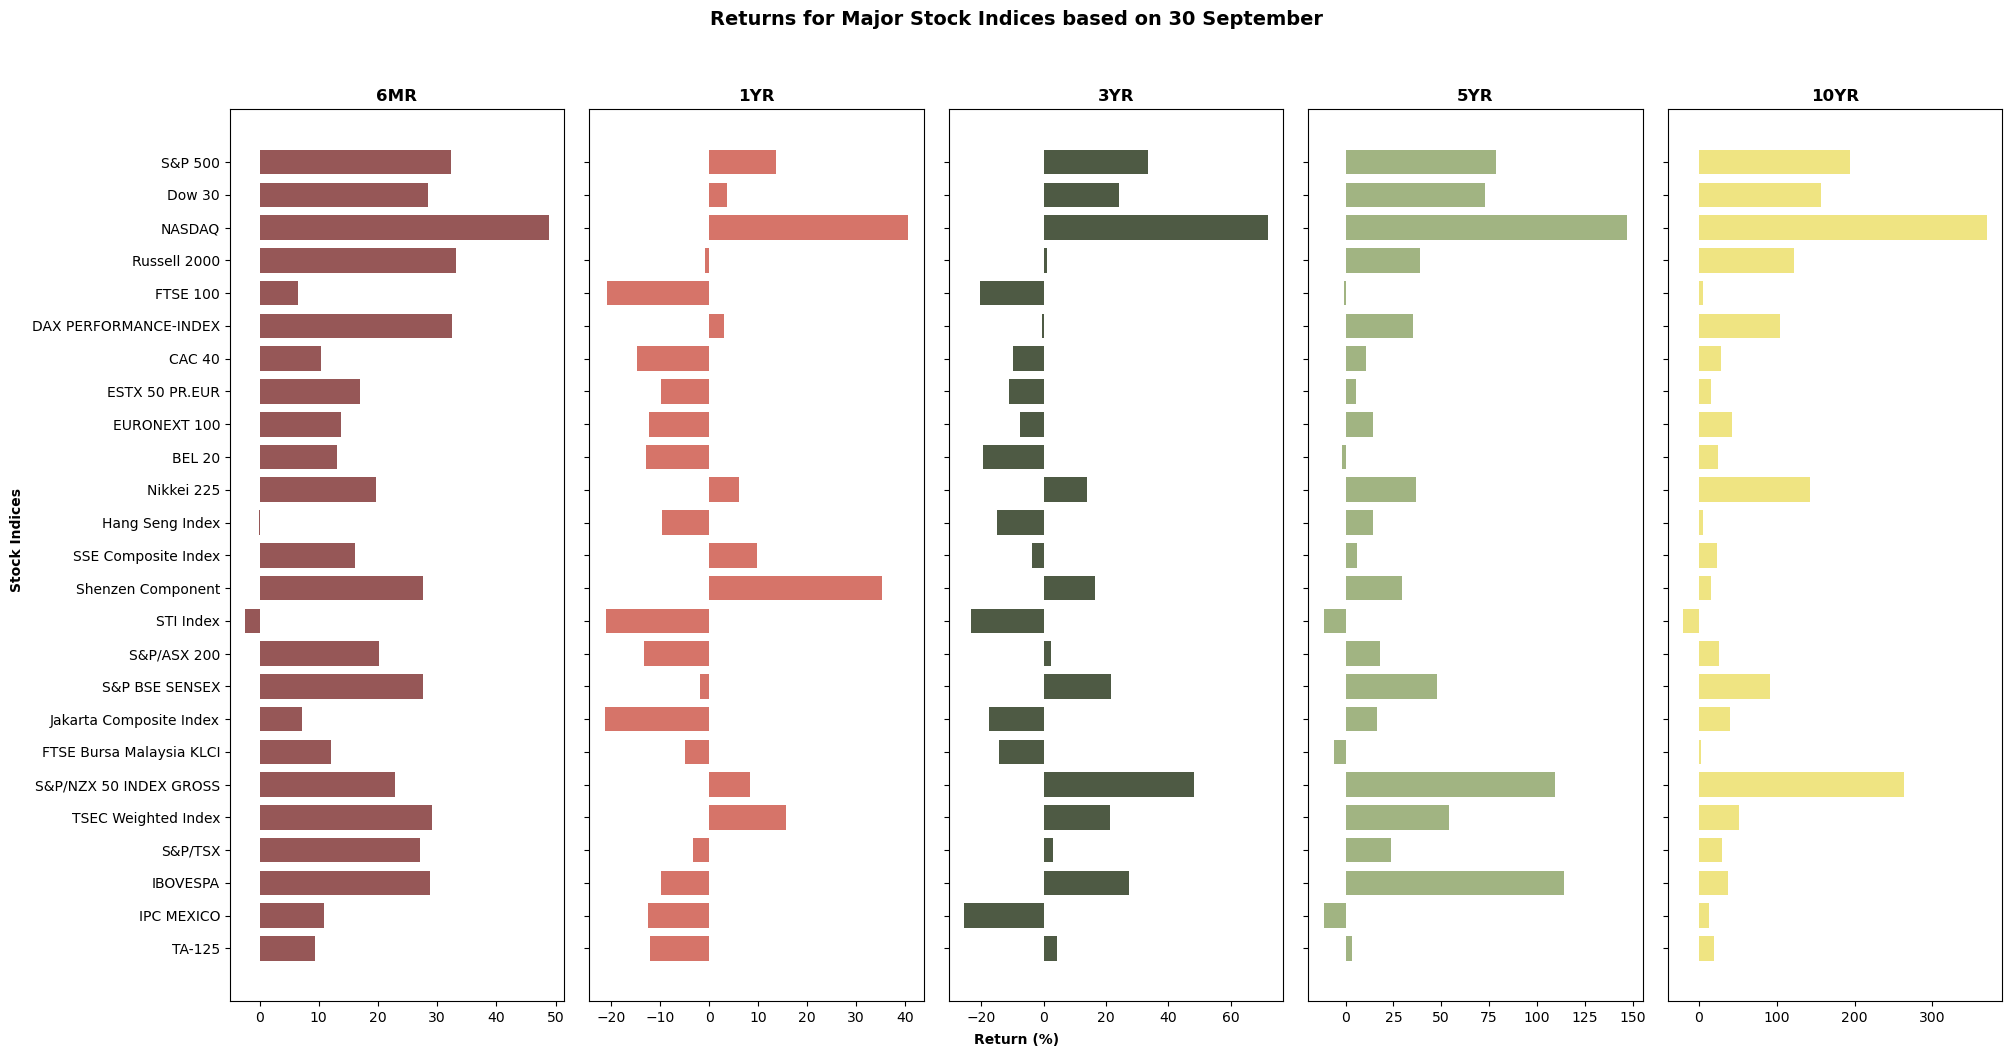

In [18]:
fig, axes = plt.subplots(1,5, figsize=(20, 10),sharey=True)
width = 0.75
cols = ['6MR','1YR','3YR', '5YR', '10YR']
for i, j in enumerate(cols):
    ax = axes[i]    
    tick = lastDate.ticker.apply(lambda t : ticker[t])
    ax.barh(tick,lastDate[j], width, color = pagoda[i])
    ax.set_title(j, fontweight ="bold")    
    ax.invert_yaxis()

fig.text(0.5,0, "Return (%)", ha="center", va="center", fontweight ="bold")
fig.text(0,0.5, "Stock Indices", ha="center", va="center", rotation=90, fontweight ="bold")
fig.suptitle("Returns for Major Stock Indices based on 30 September", fontweight ="bold",y=1.03, fontsize=14)
fig.tight_layout()

# Price Change to 4 January 2010

In [19]:
begRef = msi.loc[msi.Date == '2010-01-04']

In [20]:
def retBegin(ticker, val):
    start_val = begRef.loc[begRef.ticker == ticker, 'Close'].values[0]
    return (val/start_val - 1) * 100

msi['chBegin'] = msi.apply(lambda x: retBegin(x.ticker, x.Close), axis = 1)

In [21]:
chBegin = msi.groupby(['Date', 'ticker'])['chBegin'].first().unstack()
chBegin = chBegin.fillna(method='bfill')

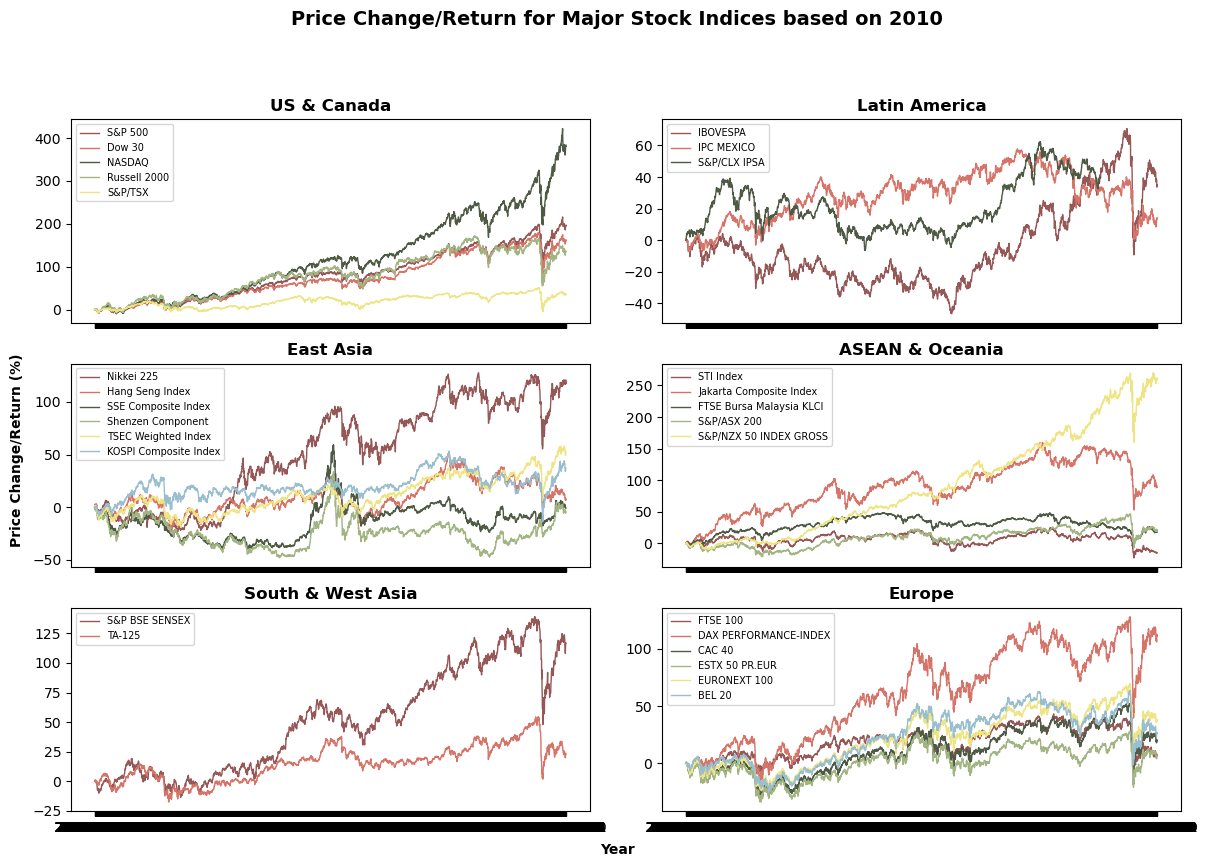

In [22]:
fig, axes = plt.subplots(3,2, figsize=(12, 8),sharex=True)

for i, k in enumerate(region_idx.keys()):
    ax = axes[int(i/2), int(i%2)]
    for j,t in enumerate(region_idx[k]):
        ax.plot(chBegin.index, chBegin[t], marker='', linewidth=1, color = pagoda[j])
        ax.legend([ticker[t] for t in region_idx[k]], loc='upper left', fontsize=7)
        ax.set_title(k, fontweight='bold')

fig.text(0.5,0, "Year", ha="center", va="center", fontweight ="bold")
fig.text(0,0.5, "Price Change/Return (%)", ha="center", va="center", rotation=90, fontweight ="bold")
fig.suptitle("Price Change/Return for Major Stock Indices based on 2010", fontweight ="bold",y=1.05, fontsize=14)
fig.tight_layout()

In [23]:
g = msi.loc[msi.ticker == '^GSPC']

In [24]:
first = g.Close.values[0]

In [25]:
last = g.Close.values[-1]

In [26]:
last

3363.0

In [27]:
first

1132.99

In [28]:
last/first

2.9682521469739362

# Price to Earning Ratio

In [29]:
bb_df = pd.read_excel('Summary.xlsx')
bb_df.head()

,Ticker,YF_Ticker,PBV_5Y_MED,PBV_4Y_MED,PBV_3Y_MED,PBV_2Y_MED,PBV_1Y_MED,PBV_Cur_MED,PBV_5Y_AVG,PBV_4Y_AVG,...,PER_3Y_MED,PER_2Y_MED,PER_1Y_MED,PER_Cur_MED,PER_5Y_AVG,PER_4Y_AVG,PER_3Y_AVG,PER_2Y_AVG,PER_1Y_AVG,PER_Cur_AVG
0,AS51,^AXJO,1.776873,1.899431,2.208011,2.173765,2.185527,2.310109,3.872426,4.212594,...,19.845159,19.128875,21.456157,26.638534,28.196201,89.158023,41.408612,30.464945,29.793753,81.838539
1,BEL20,^BFX,1.480091,1.673103,1.573235,1.660418,1.443838,1.654570,1.763259,2.282943,...,18.935364,16.734591,14.949367,17.108862,25.931858,20.985157,53.597228,21.074780,15.094253,19.982928
2,CAC,^FCHI,1.909014,1.906962,1.911296,2.402472,1.689846,1.838690,2.208934,2.454332,...,20.997387,21.667703,19.862700,23.606817,22.527276,24.672735,23.752025,21.436765,25.467825,32.556752
3,CCMP,^IXIC,2.327250,2.066645,2.279681,2.403380,2.019165,2.241363,6.696633,99.320213,...,22.053392,22.241796,16.991070,19.765937,44.843310,61.676940,43.434391,2336.964863,57.561696,105.664374
4,DAX,^GDAXI,2.324303,2.254578,2.598998,2.642194,1.554017,1.589448,2.289118,2.327397,...,19.746771,18.119695,14.147929,22.753084,17.190959,19.327609,18.547097,21.425218,16.292964,36.713964


In [30]:
bb_df['region']= bb_df.YF_Ticker.apply(lambda x: getRegion(x))

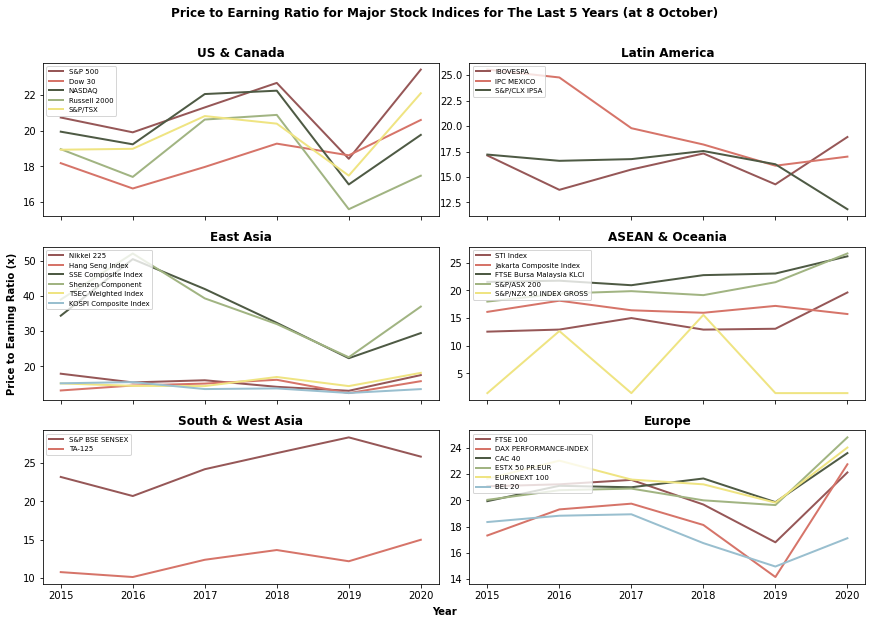

In [29]:
per_med = bb_df[['YF_Ticker', 'PER_5Y_MED', 'PER_4Y_MED','PER_3Y_MED','PER_2Y_MED', 'PER_1Y_MED', 'PER_Cur_MED']].transpose()
per_med.index = ['YF_Ticker', 2015, 2016, 2017,2018, 2019, 2020]
per_med.columns = per_med.loc['YF_Ticker']
per_med.drop(['YF_Ticker'], inplace=True)
fig, axes = plt.subplots(3,2, figsize=(12, 8),sharex=True)

for i, j in enumerate(region_idx.keys()):
    ax = axes[int(i/2), int(i%2)]
    for k,t in enumerate(region_idx[j]):
        ax.plot(per_med.index, per_med[t], marker='', linewidth=2, color=pagoda[k])
    ax.legend([ticker[t] for t in region_idx[j]], loc='upper left', fontsize=7)
    ax.set_title(j, fontweight ="bold")

fig.text(0.5,0, "Year", ha="center", va="center", fontweight ="bold")
fig.text(0,0.5, "Price to Earning Ratio (x)", ha="center", va="center", rotation=90, fontweight ="bold")
fig.suptitle("Price to Earning Ratio for Major Stock Indices for The Last 5 Years (at 8 October)", fontweight ="bold",y=1.05)
fig.tight_layout()

In [30]:
def checkPrice(ticker, date):
    df_t = msi.loc[msi.ticker == ticker].reset_index()
    existingDates = df_t['Date'].unique()
    closestDate = nearest(existingDates, date)
    return (df_t.loc[df_t.Date == closestDate, "Close"])

In [31]:
tickers = msi.ticker.unique()
price_2020 = [checkPrice(x, np.datetime64('2020-10-08')).values[0] for x in tickers]
price_2019 = [checkPrice(x, np.datetime64('2019-10-08')).values[0] for x in tickers]
price_2018 = [checkPrice(x, np.datetime64('2018-10-08')).values[0] for x in tickers]
price_2017 = [checkPrice(x, np.datetime64('2017-10-08')).values[0] for x in tickers]
price_2016 = [checkPrice(x, np.datetime64('2016-10-08')).values[0] for x in tickers]
price_2015 = [checkPrice(x, np.datetime64('2015-10-08')).values[0] for x in tickers]

In [32]:
price_df = pd.DataFrame(data = {'ticker' : tickers, 
                                'price_15' : price_2015,
                                'price_16' : price_2016,
                                'price_17' : price_2017,
                                'price_18' : price_2018,
                                'price_19' : price_2019,
                                'price_20' : price_2020,
                              }                                 
                       ).reset_index().transpose()

In [33]:
price_df.columns = price_df.loc['ticker']
price_df.drop(['index', 'ticker'], inplace = True)
price_df.index = [ 2015, 2016, 2017,2018, 2019, 2020]

In [34]:
price_df.columns

Index(['^GSPC', '^DJI', '^IXIC', '^RUT', '^FTSE', '^GDAXI', '^FCHI',
       '^STOXX50E', '^N100', '^BFX', '^N225', '^HSI', '000001.SS', '399001.SZ',
       '^STI', '^AXJO', '^BSESN', '^JKSE', '^KLSE', '^NZ50', '^KS11', '^TWII',
       '^GSPTSE', '^BVSP', '^MXX', '^IPSA', '^TA125.TA'],
      dtype='object', name='ticker')

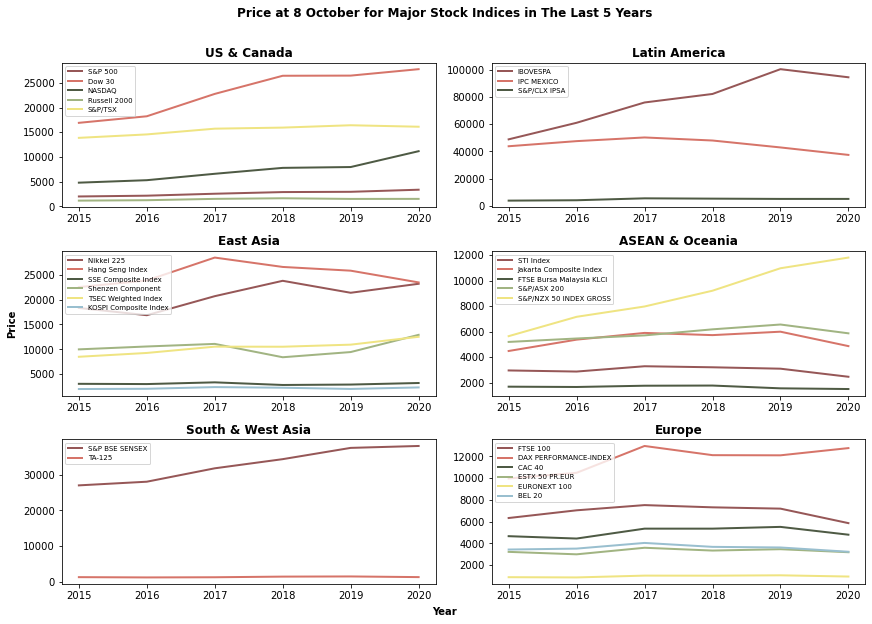

In [35]:
fig, axes = plt.subplots(3,2, figsize=(12, 8))
idx = np.arange(2015,2021)
for i, j in enumerate(region_idx.keys()):
    ax = axes[int(i/2), int(i%2)]
    for k,t in enumerate(region_idx[j]):
        ax.plot(idx, price_df[t], marker='', linewidth=2, color=pagoda[k])
    ax.legend([ticker[t] for t in region_idx[j]], loc='upper left', fontsize = 7)
    ax.set_title(j, fontweight ="bold")
    
fig.text(0.5,0, "Year", ha="center", va="center", fontweight ="bold")
fig.text(0,0.5, "Price", ha="center", va="center", rotation=90, fontweight ="bold")
fig.suptitle("Price at 8 October for Major Stock Indices in The Last 5 Years", fontweight ="bold",y=1.05)
fig.tight_layout()